<a href="https://colab.research.google.com/github/ZahraDehghani99/Digital-Image-Processing/blob/main/HW1/DIP_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work 1

## Sampling and quantization

### a) Computes the difference between values in neighboring pixels and Find the number of bytes and size of the image, and display each case.

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


تصویر اصلی ما دارای ۳ کانال می باشد. در تابعی که برای خواندن تصویر استفاده می کنیم امکان استفاده از ۳ فلگ وجود دارد. به صورت پیش فرض فلگ ۱ را داریم  به این معنی که تصویر را به صورت رنگی می خواند. فلگ 0 به معنی این است که تصویر را به صورت سیاه و سفید می خواند و فلگ  ۱- به معنی این است که تصویر را بدون تغییر می خواند.
ما این تصویر را با هر ۳ فلگ چاپ می کنیم مشاهده می شود که تغییری بین این ۳ مورد از لحاظ بصری وجود ندارد پس ما با تصویر سیاه و سفید کار می کنیم تا تعداد کانال کمتری داشته باشیم.

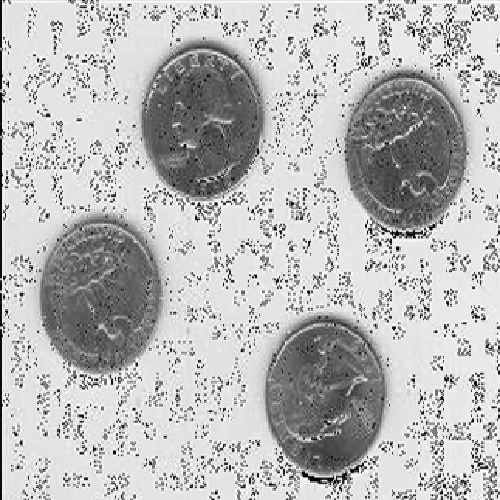


image1 shape : (500, 500, 3)


In [3]:
image1 = cv2.imread('/content/drive/MyDrive/DIP/HW1/images/image1.jpg', -1)
cv2_imshow(image1) 
print(f'\nimage1 shape : {image1.shape}')

حال می خواهیم سایز تصویر و تعداد بایت های آن را نمایش دهیم.

In [4]:
print(f'height of image1 : {image1.shape[0]}')
print(f'width of image1 : {image1.shape[1]}')
print(f'number of channels of image1 : {image1.shape[2]}')
print(f'matrix data type of image1 : {image1.dtype}')
print(f'image1 matrix : \n{image1}')

height of image1 : 500
width of image1 : 500
number of channels of image1 : 3
matrix data type of image1 : uint8
image1 matrix : 
[[[ 17  17  17]
  [ 14  14  14]
  [205 205 205]
  ...
  [224 224 224]
  [218 218 218]
  [216 216 216]]

 [[ 12  12  12]
  [ 16  16  16]
  [226 226 226]
  ...
  [246 246 246]
  [248 248 248]
  [250 250 250]]

 [[ 11  11  11]
  [ 14  14  14]
  [230 230 230]
  ...
  [247 247 247]
  [249 249 249]
  [250 250 250]]

 ...

 [[ 12  12  12]
  [ 11  11  11]
  [237 237 237]
  ...
  [ 29  29  29]
  [235 235 235]
  [235 235 235]]

 [[ 12  12  12]
  [ 11  11  11]
  [237 237 237]
  ...
  [141 141 141]
  [239 239 239]
  [245 245 245]]

 [[ 11  11  11]
  [ 11  11  11]
  [236 236 236]
  ...
  [249 249 249]
  [244 244 244]
  [248 248 248]]]


همانطور که در خروجی قطعه کد پایین می بینیم بیشترین مقداری که یک پیکسل در این تصویر می تواند داشته باشد ۲۵۵ و کمترین مقدار آن ۰ است. این به این معنی است که تعداد بیت های لازم برای نگه داری شدت روشنایی برای هر پیکسل ۸ بیت است.

In [5]:
print(f'max element in image1 : {np.amax(image1)}')
print(f'min element in image1 : {np.amin(image1)}')

max element in image1 : 255
min element in image1 : 0


In [6]:
import os
bits = image1.shape[0]*image1.shape[1]*image1.shape[2]*8
print(f'number of bits for image: {bits}')
print(f'number of bytes for image: {bits/8}')
print(f"number of bytes in drive : {os.path.getsize('/content/drive/MyDrive/DIP/HW1/images/image1.jpg')}")

number of bits for image: 6000000
number of bytes for image: 750000.0
number of bytes in drive : 138257


محاسبه تفاوت هر پیکسل با همسابه اش

In [7]:
diff_row = np.diff(image1, axis = 0)
print(f'diff along row shape : {diff_row.shape}')

diff along row shape : (499, 500, 3)


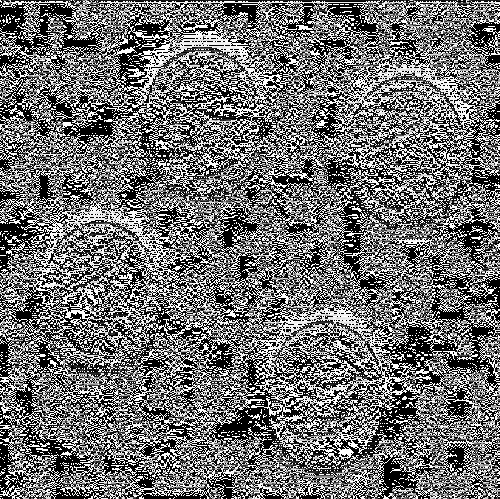

In [8]:
cv2_imshow(diff_row)

In [9]:
diff_column = np.diff(image1, axis=1)
print(f'diff along column shape : {diff_column.shape}')

diff along column shape : (500, 499, 3)


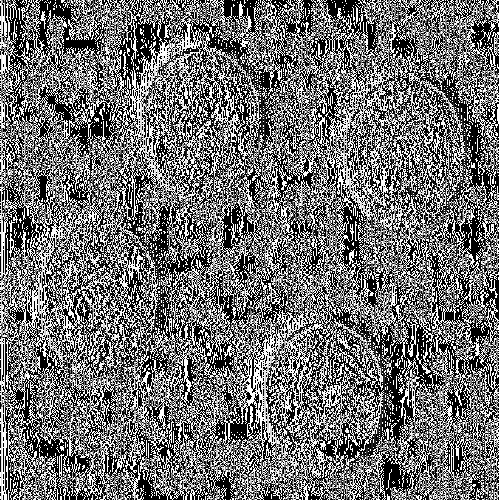

In [10]:
cv2_imshow(diff_column)

In [11]:
diff_row == diff_column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

حال می خواهیم هیستوگرام را برای تصویر رسم کنیم.

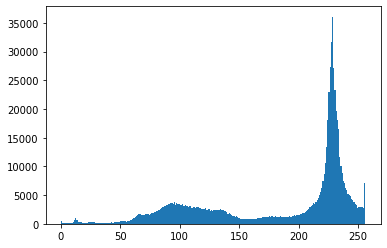

In [12]:
plt.hist(image1.ravel(),bins = 256, range = [0,256]) 
plt.show()

### Representation the image with unit-8 data type, default type (float 64) and by adding bias (128) and plot it.

تصویر اصلی ما از نوع عدد صحیح بدون علامت در بازه ۰ تا ۲۵۵ است. ما آن را به عدد اعشاری تبدیل می کنیم که بازه ۰ تا ۱ دارد. آن را نمایش می دهیم . همانطور که می بینیم دقت تصویر کم شده و تصویر سیاه داریم. در صورتی که در ماتریس مقادیر ۰ نیستند و از ۰ فاصله دارند.


In [13]:
from skimage.util import img_as_ubyte, img_as_float
image1_float = img_as_float(image1)
print(f'matrix of image1_float: \n{image1_float}')

matrix of image1_float: 
[[[0.06666667 0.06666667 0.06666667]
  [0.05490196 0.05490196 0.05490196]
  [0.80392157 0.80392157 0.80392157]
  ...
  [0.87843137 0.87843137 0.87843137]
  [0.85490196 0.85490196 0.85490196]
  [0.84705882 0.84705882 0.84705882]]

 [[0.04705882 0.04705882 0.04705882]
  [0.0627451  0.0627451  0.0627451 ]
  [0.88627451 0.88627451 0.88627451]
  ...
  [0.96470588 0.96470588 0.96470588]
  [0.97254902 0.97254902 0.97254902]
  [0.98039216 0.98039216 0.98039216]]

 [[0.04313725 0.04313725 0.04313725]
  [0.05490196 0.05490196 0.05490196]
  [0.90196078 0.90196078 0.90196078]
  ...
  [0.96862745 0.96862745 0.96862745]
  [0.97647059 0.97647059 0.97647059]
  [0.98039216 0.98039216 0.98039216]]

 ...

 [[0.04705882 0.04705882 0.04705882]
  [0.04313725 0.04313725 0.04313725]
  [0.92941176 0.92941176 0.92941176]
  ...
  [0.11372549 0.11372549 0.11372549]
  [0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863]]

 [[0.04705882 0.04705882 0.04705882]
  [0.0431372

In [14]:
print(f'image1_float shape : {image1_float.shape}')
print(f'image1_float type : {image1_float.dtype}')

image1_float shape : (500, 500, 3)
image1_float type : float64


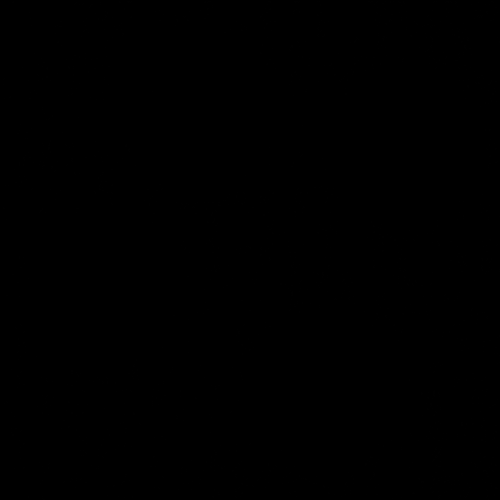

In [15]:
cv2_imshow(image1_float)

حال دوباره تصویر را از حالت اعشاری به عدد صحیح ی علامت در بازه ی ۰ تا ۲۵۵ تبدیل می کنیم و نمایش می دهیم.

image1_unit shape : uint8



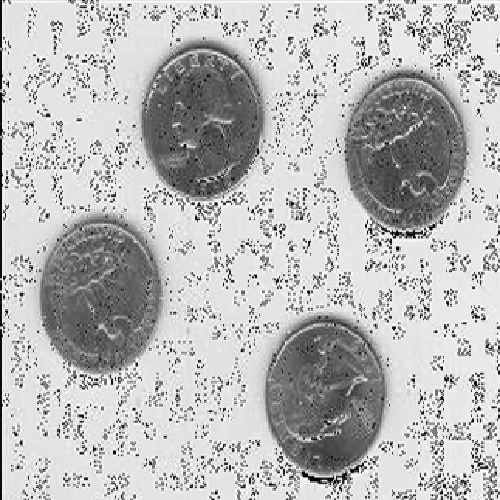

In [16]:
image1_unit = img_as_ubyte(image1_float)
print(f'image1_unit shape : {image1_unit.dtype}\n')
cv2_imshow(image1_unit)

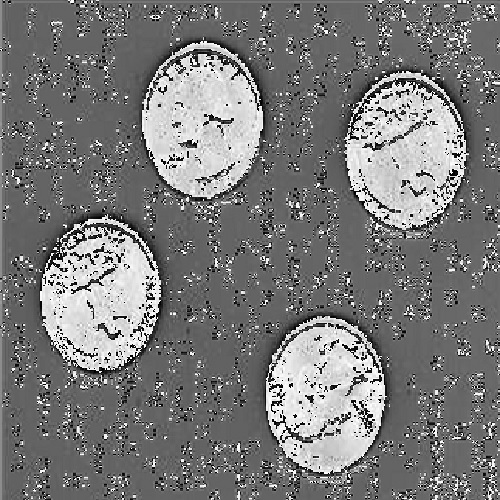

In [17]:
image1_new = image1 + 128
cv2_imshow(image1_new)

In [18]:
print(f'matrix of image1_new : \n{image1_new}')

matrix of image1_new : 
[[[145 145 145]
  [142 142 142]
  [ 77  77  77]
  ...
  [ 96  96  96]
  [ 90  90  90]
  [ 88  88  88]]

 [[140 140 140]
  [144 144 144]
  [ 98  98  98]
  ...
  [118 118 118]
  [120 120 120]
  [122 122 122]]

 [[139 139 139]
  [142 142 142]
  [102 102 102]
  ...
  [119 119 119]
  [121 121 121]
  [122 122 122]]

 ...

 [[140 140 140]
  [139 139 139]
  [109 109 109]
  ...
  [157 157 157]
  [107 107 107]
  [107 107 107]]

 [[140 140 140]
  [139 139 139]
  [109 109 109]
  ...
  [ 13  13  13]
  [111 111 111]
  [117 117 117]]

 [[139 139 139]
  [139 139 139]
  [108 108 108]
  ...
  [121 121 121]
  [116 116 116]
  [120 120 120]]]


### c) How many bits can manage so that we still have a good image? Plot all of the cases.

useful link : https://scikit-image.org/docs/dev/user_guide/data_types.html#rescaling-intensity-values

In [19]:
from skimage import exposure
image1bit = exposure.rescale_intensity(image1, in_range=(0, 2**1 - 1), out_range=(0, 2**1 - 1))
image2bit = exposure.rescale_intensity(image1, in_range=(0, 2**2 - 1), out_range=(0, 2**2 - 1))
image3bit = exposure.rescale_intensity(image1, in_range=(0, 2**3 - 1), out_range=(0, 2**3 - 1))
image4bit = exposure.rescale_intensity(image1, in_range=(0, 2**4 - 1), out_range=(0, 2**4 - 1))
image5bit = exposure.rescale_intensity(image1, in_range=(0, 2**5 - 1), out_range=(0, 2**5 - 1))
image6bit = exposure.rescale_intensity(image1, in_range=(0, 2**6 - 1), out_range=(0, 2**6 - 1))
image7bit = exposure.rescale_intensity(image1, in_range=(0, 2**7 - 1), out_range=(0, 2**7 - 1))
image8bit = exposure.rescale_intensity(image1, in_range=(0, 2**8 - 1), out_range=(0, 2**8 - 1))

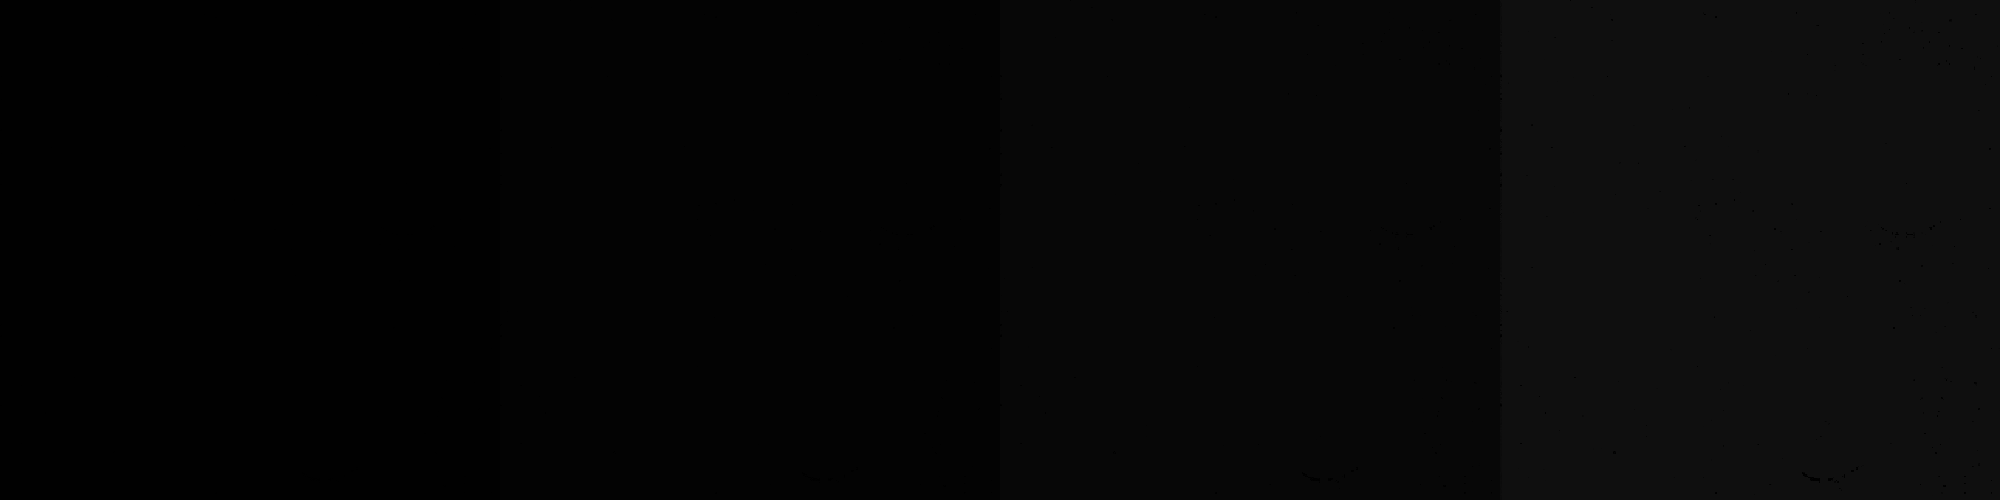

In [20]:
first4bit = np.hstack([image1bit, image2bit, image3bit, image4bit]) 
cv2_imshow(first4bit)

همانطور که می بینیم تعداد بیت های کمتر از ۸ نمی توانند جزییات تصویر را به خوبی بیان کنند.

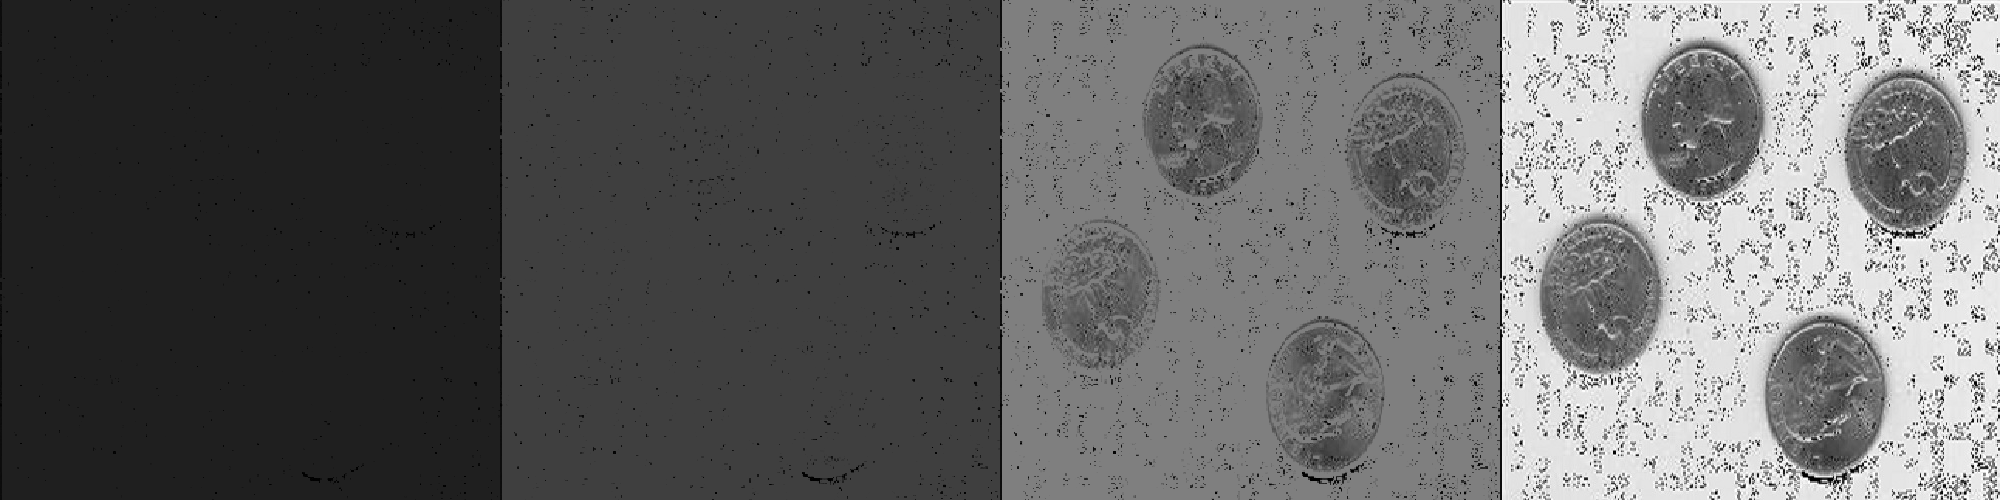

In [21]:
second4bit = np.hstack([image5bit, image6bit, image7bit, image8bit]) 
cv2_imshow(second4bit)

## Geometrical spatial operations

### 2- Perform the scaling (1.5*1.5), translation and rotation (90°) operations for image2 and plot the final image in each case.

scaling using resize function:

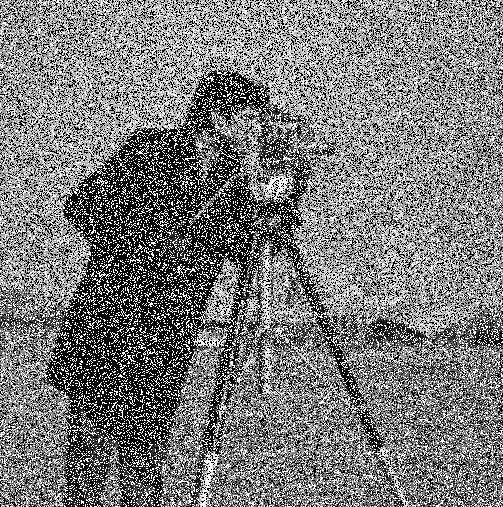


image2 shape : (507, 503, 3)


In [22]:
image2 = cv2.imread('/content/drive/MyDrive/DIP/HW1/images/image2.jpg', -1)
cv2_imshow(image2)
print(f'\nimage2 shape : {image2.shape}')

image2 after scaling


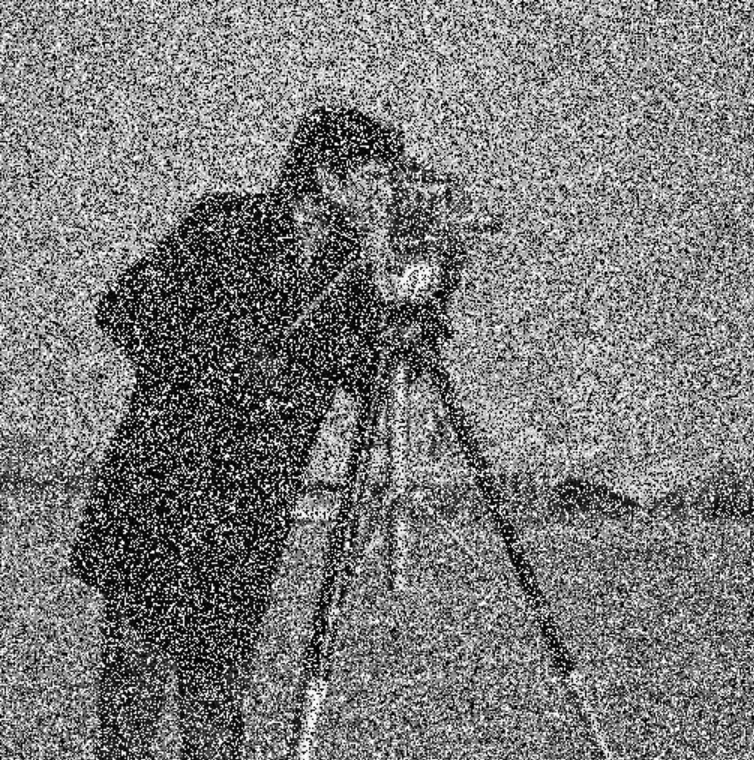

In [23]:
image2_scale = cv2.resize(image2, None, fx=1.5, fy=1.5)
print('image2 after scaling')
cv2_imshow(image2_scale)

scaling using affine transformation:

image 2 before and after scaling


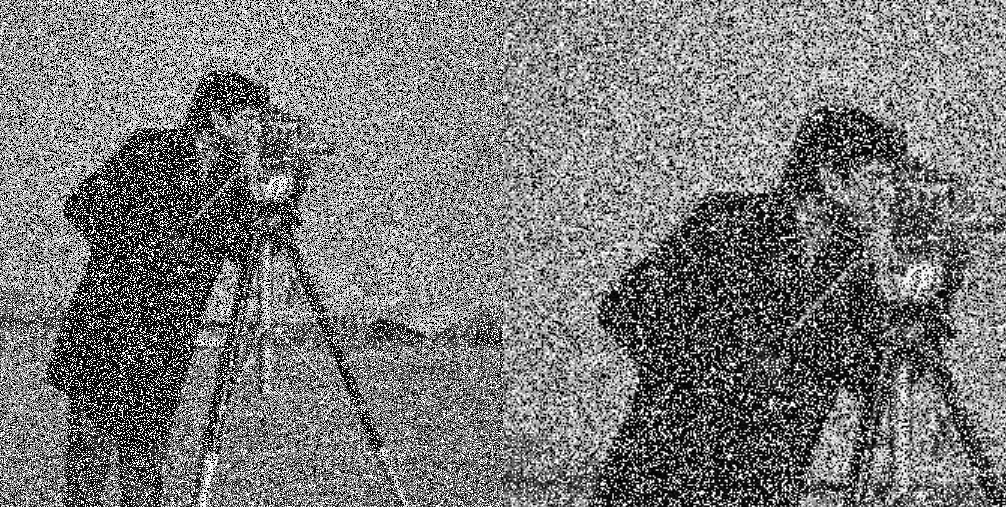

In [25]:
height, width = image2.shape[:2]
Scale = np.float32([[1.5, 0, 0], [0, 1.5, 0]])
image2_scale = cv2.warpAffine(image2, Scale, (width, height))
before_after_scale = np.hstack([image2, image2_scale])
print('image 2 before and after scaling')
cv2_imshow(before_after_scale)

در این قسمت می خواهیم تا تصویر را به اندازه ۱.۵ برایر سطر و ستون جابجا کنیم

image 2 before and after translation


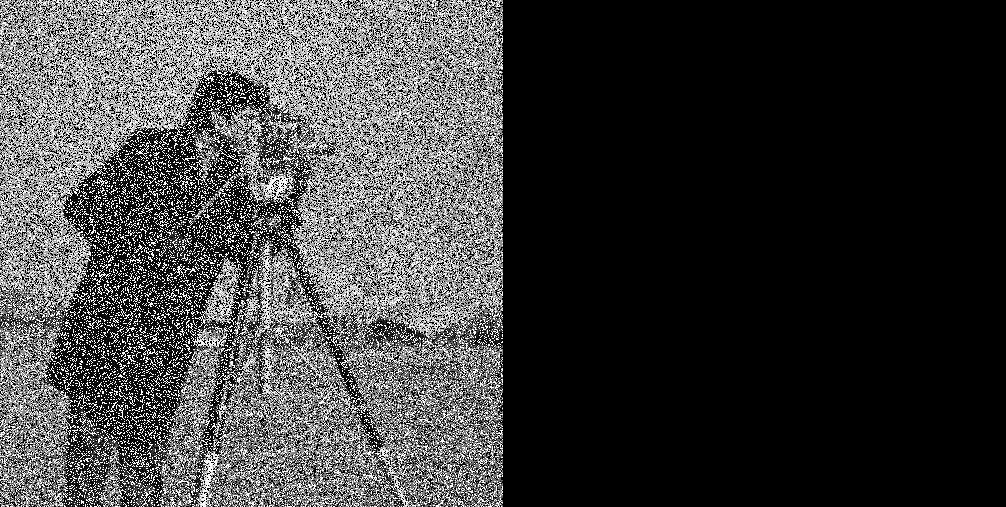

In [26]:
# Store height and width of the image
height, width = image2.shape[:2]
  
new_height, new_width = height*1.5, width*1.5
  
T = np.float32([[1, 0, new_width], [0, 1, new_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
image2_translation = cv2.warpAffine(image2, T, (width, height))

before_after = np.hstack([image2, image2_translation])  
print(f'image 2 before and after translation')
cv2_imshow(before_after)

حال اگر بخواهیم تصویر را به اندازه ربع سطر و ستون جابجا کنیم به صورت زیر در می آید.

image 2 before and after translation


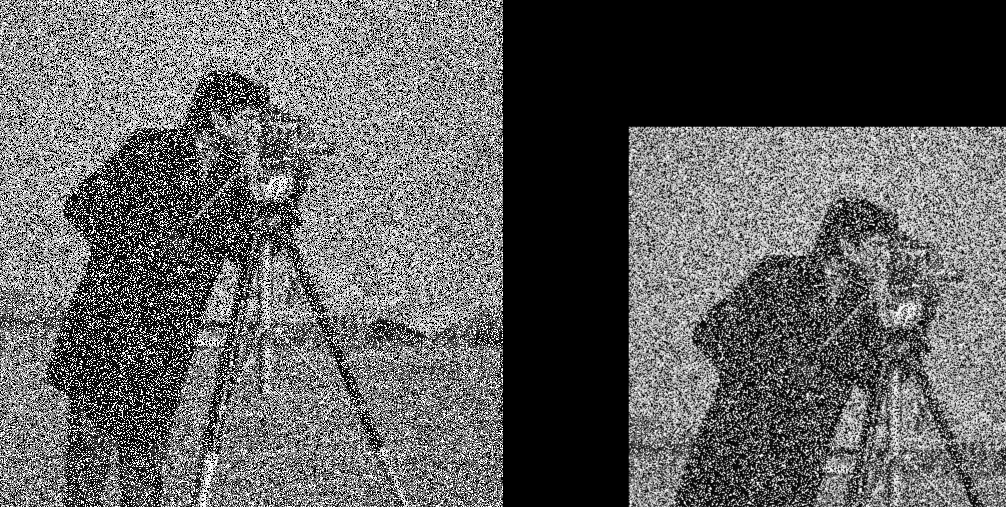

In [27]:
# Store height and width of the image
height, width = image2.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
image2_translation = cv2.warpAffine(image2, T, (width, height))
  
before_after = np.hstack([image2, image2_translation])  
print(f'image 2 before and after translation')
cv2_imshow(before_after)

Rotation

image2 before and after rotation


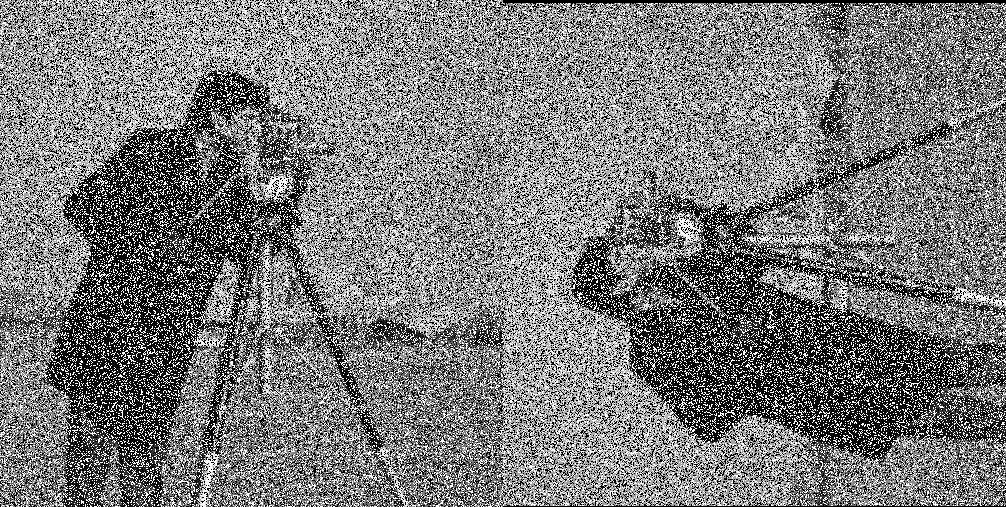

In [30]:
height, width = image2.shape[:2]
# dividing height and width by 2 to get the center of the image
# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)

# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=90, scale=1)

# rotate the image using cv2.warpAffine
rotated_image2 = cv2.warpAffine(src=image2, M=rotate_matrix, dsize=(width, height))
before_after_rotation = np.hstack([image2, rotated_image2])
print('image2 before and after rotation')
cv2_imshow(before_after_rotation)

## Filtering in Spatial Domain